<a href="https://colab.research.google.com/github/dongjun-kor/Python/blob/main/dongjun_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 영감: lee-ju

In [ ]:
# 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
"""import os, sys
pkg_path = '/content/packages'
os.symlink('/content/drive/MyDrive/Colab Notebooks', pkg_path)
sys.path.insert(0, pkg_path)"""

In [ ]:
"""#!pip install git+https://github.com/lee-ju/Statistical_Quality_Control.git
#!pip install --target=$pkg_path git+https://github.com/lee-ju/Statistical_Quality_Control.git
#!pip uninstall Statistical_Quality_Control
!pip install --target=$pkg_path git+https://github.com/lee-ju/Statistical_Quality_Control.git --upgrade"""

In [ ]:
import tensorflow as tf
tf.__version__

'2.8.0'

In [ ]:
import numpy as np
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/LSTMipc1.csv',
                 parse_dates =["date"], index_col ="date", dtype={'N':'float'},
                 engine='python',encoding='euc-kr')
df.head()

,N
date,
2021-01-10,9.0
2021-02-10,8.0
2021-03-10,10.0
2021-04-10,10.0
2021-05-10,5.0


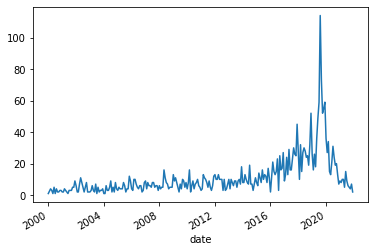

In [ ]:
df['N'].plot()

(141, 1) (56, 1) (65, 1)


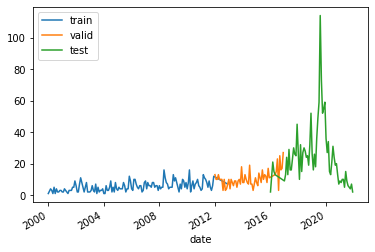

In [ ]:
# Validation set 추가
split_date1 = pd.Timestamp('2012-12-10')
split_date2 = pd.Timestamp('2016-05-10')

train_valid = df.loc[split_date2:, ] # 2016-05-10 이전
test = df.loc[:split_date2, ['N']] # 2016-05-10 이후

train = train_valid.loc[split_date1:, ['N']] # 2012-12-10 이전
valid = train_valid.loc[:split_date1, ['N']] # 2012-12-10 이후

print(train.shape, valid.shape, test.shape)

ax = train.plot()
valid.plot(ax=ax)
test.plot(ax=ax)
plt.legend(['train', 'valid', 'test'])

In [ ]:
#학습되지 않아서 정규화 진행 X
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

train_sc = sc.fit_transform(train)
valid_sc = sc.transform(valid) # 추가
test_sc = sc.transform(test)

In [ ]:
# pd.DataFrame(train, ...) ---> pd.DataFrame(train_sc)
# 정규화 데이터 사용할 것
train_sc_df = pd.DataFrame(train_sc, columns=['N'], index=train.index)
valid_sc_df = pd.DataFrame(valid_sc, columns=['N'], index=valid.index)
test_sc_df = pd.DataFrame(test_sc, columns=['N'], index=test.index)

In [ ]:
for s in range(1, 13):
    train_sc_df['shift_{}'.format(s)] = train_sc_df['N'].shift(s)
    valid_sc_df['shift_{}'.format(s)] = valid_sc_df['N'].shift(s) # 추가
    test_sc_df['shift_{}'.format(s)] = test_sc_df['N'].shift(s)

train_sc_df.head(13)

,N,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
date,,,,,,,,,,,,,
2012-12-10,0.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-10,0.133333,0.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-02-10,0.200000,0.133333,0.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-03-10,0.800000,0.200000,0.133333,0.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-04-10,0.666667,0.800000,0.200000,0.133333,0.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-05-10,0.600000,0.666667,0.800000,0.200000,0.133333,0.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-10,0.466667,0.600000,0.666667,0.800000,0.200000,0.133333,0.400000,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-10,0.266667,0.466667,0.600000,0.666667,0.800000,0.200000,0.133333,0.400000,NaN,NaN,NaN,NaN,NaN
2011-08-10,0.533333,0.266667,0.466667,0.600000,0.666667,0.800000,0.200000,0.133333,0.400000,NaN,NaN,NaN,NaN


In [ ]:
X_train = train_sc_df.dropna().drop('N', axis=1)
y_train = train_sc_df.dropna()[['N']]

X_valid = valid_sc_df.dropna().drop('N', axis=1)
y_valid = valid_sc_df.dropna()[['N']]

X_test = test_sc_df.dropna().drop('N', axis=1)
y_test = test_sc_df.dropna()[['N']]

X_train.head()

,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
date,,,,,,,,,,,,
2011-12-10,0.333333,0.133333,0.266667,0.533333,0.266667,0.466667,0.600000,0.666667,0.800000,0.200000,0.133333,0.400000
2010-01-10,0.733333,0.333333,0.133333,0.266667,0.533333,0.266667,0.466667,0.600000,0.666667,0.800000,0.200000,0.133333
2010-02-10,0.200000,0.733333,0.333333,0.133333,0.266667,0.533333,0.266667,0.466667,0.600000,0.666667,0.800000,0.200000
2010-03-10,0.466667,0.200000,0.733333,0.333333,0.133333,0.266667,0.533333,0.266667,0.466667,0.600000,0.666667,0.800000
2010-04-10,1.000000,0.466667,0.200000,0.733333,0.333333,0.133333,0.266667,0.533333,0.266667,0.466667,0.600000,0.666667


In [ ]:
X_train = X_train.values
X_valid = X_valid.values # 추가
X_test= X_test.values

y_train = y_train.values
y_valid = y_valid.values # 추가
y_test = y_test.values

In [ ]:
X_train_t = X_train.reshape(X_train.shape[0], 12, 1)
X_valid_t = X_valid.reshape(X_valid.shape[0], 12, 1) # 추가
X_test_t = X_test.reshape(X_test.shape[0], 12, 1)
print("최종 DATA")
print(X_train_t.shape, X_valid_t.shape, X_test_t.shape)

최종 DATA
(129, 12, 1) (44, 12, 1) (53, 12, 1)


In [ ]:
model = Sequential() # Sequeatial Model 
model.add(LSTM(50,activation='relu', input_shape=(12, 1))) # (timestep, feature) 
model.add(Dense(1)) # output = 1 
model.compile(loss='mae', optimizer='adam',metrics=['mae']) 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 더 깊은 모델
deep_model = Sequential() # Sequeatial Model 
deep_model.add(LSTM(50,activation='relu', input_shape=(12, 1))) # (timestep, feature) 
deep_model.add(Dense(32, activation='relu'))
deep_model.add(Dropout(0.2))
deep_model.add(Dense(8, activation='relu'))
deep_model.add(Dropout(0.2))
deep_model.add(Dense(1)) # output = 1 
deep_model.compile(loss='mae', optimizer='adam',metrics=['mae']) 
deep_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 50)                10400     
                                                                 
 dense_1 (Dense)             (None, 32)                1632      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 264       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 12,305
Trainable params: 12,305
Non-trai

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min',
                   verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5',
                     monitor='val_loss',
                     mode='min',
                     save_best_only=True)
model_history = model.fit(X_train_t, y_train,
                          validation_data=(X_valid_t, y_valid),
                          epochs=1000, batch_size=32,
                          callbacks=[es, mc], verbose=1)

Epoch 1/1000
5/5 [==============================] - 6s 242ms/step - loss: 0.2584 - mae: 0.2584 - val_loss: 0.4327 - val_mae: 0.4327
Epoch 2/1000
5/5 [==============================] - 0s 67ms/step - loss: 0.2119 - mae: 0.2119 - val_loss: 0.3501 - val_mae: 0.3501
Epoch 3/1000
5/5 [==============================] - 1s 109ms/step - loss: 0.1748 - mae: 0.1748 - val_loss: 0.2761 - val_mae: 0.2761
Epoch 4/1000
5/5 [==============================] - 0s 86ms/step - loss: 0.1556 - mae: 0.1556 - val_loss: 0.2313 - val_mae: 0.2313
Epoch 5/1000
5/5 [==============================] - 0s 100ms/step - loss: 0.1490 - mae: 0.1490 - val_loss: 0.2204 - val_mae: 0.2204
Epoch 6/1000
5/5 [==============================] - 0s 91ms/step - loss: 0.1485 - mae: 0.1485 - val_loss: 0.2199 - val_mae: 0.2199
Epoch 7/1000
5/5 [==============================] - 0s 70ms/step - loss: 0.1486 - mae: 0.1486 - val_loss: 0.2240 - val_mae: 0.2240
Epoch 8/1000
5/5 [==============================] - 0s 91ms/step - loss: 0.1485 

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min',
                   verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5',
                     monitor='val_loss',
                     mode='min',
                     save_best_only=True)
deep_model_history = deep_model.fit(X_train_t, y_train,
                                    validation_data=(X_valid_t, y_valid),
                                    epochs=1000, batch_size=32,
                                    callbacks=[es, mc], verbose=1)

Epoch 1/1000
5/5 [==============================] - 2s 113ms/step - loss: 0.2771 - mae: 0.2771 - val_loss: 0.5046 - val_mae: 0.5046
Epoch 2/1000
5/5 [==============================] - 0s 52ms/step - loss: 0.2465 - mae: 0.2465 - val_loss: 0.4630 - val_mae: 0.4630
Epoch 3/1000
5/5 [==============================] - 0s 50ms/step - loss: 0.2174 - mae: 0.2174 - val_loss: 0.4085 - val_mae: 0.4085
Epoch 4/1000
5/5 [==============================] - 0s 51ms/step - loss: 0.1817 - mae: 0.1817 - val_loss: 0.3319 - val_mae: 0.3319
Epoch 5/1000
5/5 [==============================] - 0s 48ms/step - loss: 0.1707 - mae: 0.1707 - val_loss: 0.2730 - val_mae: 0.2730
Epoch 6/1000
5/5 [==============================] - 0s 47ms/step - loss: 0.1662 - mae: 0.1662 - val_loss: 0.2746 - val_mae: 0.2746
Epoch 7/1000
5/5 [==============================] - 0s 39ms/step - loss: 0.1679 - mae: 0.1679 - val_loss: 0.2808 - val_mae: 0.2808
Epoch 8/1000
5/5 [==============================] - 0s 39ms/step - loss: 0.1628 - 

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
pred = model.predict(X_test_t)
mae_model = mean_absolute_error(y_true=y_test, y_pred=pred)
mape_model = mean_absolute_percentage_error(y_true=y_test, y_pred=pred)
print(mae_model, mape_model)

1.0789004716483301 0.678206266317888


In [ ]:
deep_pred = deep_model.predict(X_test_t)
mae_deep_model = mean_absolute_error(y_true=y_test, y_pred=deep_pred)
mape_deep_model = mean_absolute_percentage_error(y_true=y_test, y_pred=deep_pred)
print(mae_deep_model, mape_deep_model)

1.3008731549640873 0.7071208447718679


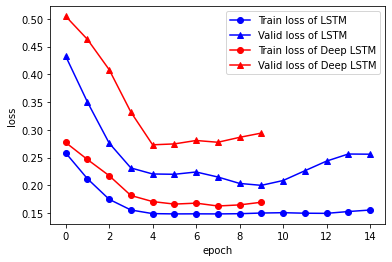

In [ ]:
fig, ax = plt.subplots()
ax.plot(model_history.history['loss'],
        'bo-', label='Train loss of LSTM')
ax.plot(model_history.history['val_loss'],
        'b^-', label='Valid loss of LSTM')

ax.plot(deep_model_history.history['loss'],
        'ro-', label='Train loss of Deep LSTM')
ax.plot(deep_model_history.history['val_loss'],
        'r^-', label='Valid loss of Deep LSTM')

ax.set_xlabel('epoch')
ax.set_ylabel('loss')

ax.legend(loc='upper right')
plt.show()

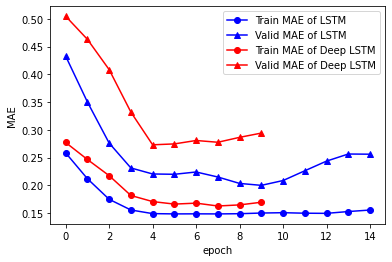

In [ ]:
fig, ax = plt.subplots()
ax.plot(model_history.history['mae'],
        'bo-', label='Train MAE of LSTM')
ax.plot(model_history.history['val_mae'],
        'b^-', label='Valid MAE of LSTM')

ax.plot(deep_model_history.history['mae'],
        'ro-', label='Train MAE of Deep LSTM')
ax.plot(deep_model_history.history['val_mae'],
        'r^-', label='Valid MAE of Deep LSTM')

ax.set_xlabel('epoch')
ax.set_ylabel('MAE')

ax.legend(loc='upper right')
plt.show()

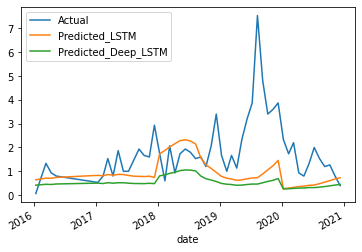

In [ ]:
t_df = test_sc_df.dropna()
y_test_df = pd.DataFrame(y_test, columns=['N'], index=t_df.index)
y_pred_df = pd.DataFrame(pred, columns=['N'], index=t_df.index)
y_deep_pred_df = pd.DataFrame(deep_pred, columns=['N'], index=t_df.index)

ax1 = y_test_df.plot()
y_pred_df.plot(ax=ax1)
y_deep_pred_df.plot(ax=ax1)
plt.legend(['Actual', 'Predicted_LSTM', 'Predicted_Deep_LSTM'])